In [2]:
!pip install torch torchvision tensorboard tqdm matplotlib numpy

In [ ]:
from data.datasets import get_cifar10_dataloaders 
from models.glow import Glow, PadChannel            
from utils.train import train_model 

In [3]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from typing import Callable, Optional, Dict
from enum import IntEnum

    # Parameters
batch_size = 64
num_epochs = 20
learning_rate = 0.001
num_blocks = 8
num_scales = 2  # Ensure that your image dimensions are compatible with num_scales
num_channels = 4  # Updated to 4 channels after padding
hidden_channels = 128  # Adjust as needed
model_name = 'Glow'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

    # Data loading and preprocessing
train_loader, val_loader, test_loader, denorm_params = get_cifar10_dataloaders(batch_size=batch_size)

    # Model, loss function, optimizer
model = Glow(num_scales=num_scales, num_blocks=num_blocks, num_channels=num_channels, hidden_channels=hidden_channels, device=device).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # TensorBoard writer
writer = SummaryWriter(log_dir=f'logs/{model_name}')

    # Directory to save generated images
image_save_dir = f'images/{model_name}'
os.makedirs(image_save_dir, exist_ok=True)

    # Train the model using the training pipeline
train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer,
        num_epochs=num_epochs,
        device=device,
        model_name=model_name,
        logger=writer,
        save_best=True,
        denorm_params=None,
        model_update_fn=None,  
        generate_images_flag=True
)



Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


Training Epoch 1/20: 100%|██████████| 782/782 [00:40<00:00, 19.54it/s, Loss=3.76e+3]


Epoch [1/20], Training Loss: 4123.593721, Validation Loss: 3758.884288
Best model saved with validation loss: 3758.884288
Generated images saved to images/Glow_CIFAR10/generated_epoch_1.png


Training Epoch 2/20: 100%|██████████| 782/782 [00:39<00:00, 19.96it/s, Loss=3.78e+3]


Epoch [2/20], Training Loss: 4676.453191, Validation Loss: 3776.272866


Training Epoch 3/20: 100%|██████████| 782/782 [00:39<00:00, 19.97it/s, Loss=3.77e+3]


Epoch [3/20], Training Loss: 3768.882883, Validation Loss: 3769.521919


Training Epoch 4/20: 100%|██████████| 782/782 [00:39<00:00, 19.89it/s, Loss=3.77e+3]
/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/summary.py:576: RuntimeWarning: invalid value encountered in cast
  tensor = (tensor * scale_factor).clip(0, 255).astype(np.uint8)


Epoch [4/20], Training Loss: 3772.864012, Validation Loss: 3765.268890


Training Epoch 5/20: 100%|██████████| 782/782 [00:39<00:00, 19.98it/s, Loss=3.76e+3]


Epoch [5/20], Training Loss: 3764.395459, Validation Loss: 3763.456849


Training Epoch 6/20: 100%|██████████| 782/782 [00:39<00:00, 19.96it/s, Loss=3.76e+3]


Epoch [6/20], Training Loss: 3763.049057, Validation Loss: 3762.157241


Training Epoch 7/20: 100%|██████████| 782/782 [00:38<00:00, 20.06it/s, Loss=3.76e+3]


Epoch [7/20], Training Loss: 3761.947325, Validation Loss: 3760.749472


Training Epoch 8/20: 100%|██████████| 782/782 [00:39<00:00, 19.80it/s, Loss=3.76e+3]


Epoch [8/20], Training Loss: 3760.187578, Validation Loss: 3759.707964


Training Epoch 9/20: 100%|██████████| 782/782 [00:39<00:00, 20.03it/s, Loss=3.76e+3]


Epoch [9/20], Training Loss: 3759.221124, Validation Loss: 3758.404451
Best model saved with validation loss: 3758.404451
Generated images saved to images/Glow_CIFAR10/generated_epoch_9.png


Training Epoch 10/20: 100%|██████████| 782/782 [00:39<00:00, 19.92it/s, Loss=3.76e+3]


Epoch [10/20], Training Loss: 3761.432861, Validation Loss: 3757.884129
Best model saved with validation loss: 3757.884129
Generated images saved to images/Glow_CIFAR10/generated_epoch_10.png


Training Epoch 11/20: 100%|██████████| 782/782 [00:39<00:00, 19.83it/s, Loss=3.76e+3]


Epoch [11/20], Training Loss: 3756.755012, Validation Loss: 3756.618614
Best model saved with validation loss: 3756.618614
Generated images saved to images/Glow_CIFAR10/generated_epoch_11.png


Training Epoch 12/20: 100%|██████████| 782/782 [00:38<00:00, 20.21it/s, Loss=3.75e+3]


Epoch [12/20], Training Loss: 3754.793085, Validation Loss: 3752.730849
Best model saved with validation loss: 3752.730849
Generated images saved to images/Glow_CIFAR10/generated_epoch_12.png


Training Epoch 13/20: 100%|██████████| 782/782 [00:39<00:00, 19.90it/s, Loss=3.75e+3]


Epoch [13/20], Training Loss: 3751.540271, Validation Loss: 3749.567427
Best model saved with validation loss: 3749.567427
Generated images saved to images/Glow_CIFAR10/generated_epoch_13.png


Training Epoch 14/20: 100%|██████████| 782/782 [00:39<00:00, 19.88it/s, Loss=3.76e+3]


Epoch [14/20], Training Loss: 4097.971411, Validation Loss: 3757.130381


Training Epoch 15/20: 100%|██████████| 782/782 [00:39<00:00, 19.86it/s, Loss=3.75e+3]


Epoch [15/20], Training Loss: 3755.220400, Validation Loss: 3754.066998


Training Epoch 16/20: 100%|██████████| 782/782 [00:39<00:00, 19.79it/s, Loss=3.75e+3]


Epoch [16/20], Training Loss: 3754.330342, Validation Loss: 3753.284197


Training Epoch 17/20: 100%|██████████| 782/782 [00:39<00:00, 20.00it/s, Loss=3.75e+3]


Epoch [17/20], Training Loss: 3752.839672, Validation Loss: 3752.550728


Training Epoch 18/20: 100%|██████████| 782/782 [00:39<00:00, 20.04it/s, Loss=3.75e+3]


Epoch [18/20], Training Loss: 3751.941770, Validation Loss: 3751.442708


Training Epoch 19/20: 100%|██████████| 782/782 [00:39<00:00, 19.92it/s, Loss=3.76e+3]


Epoch [19/20], Training Loss: 3791.933945, Validation Loss: 3756.418980


Training Epoch 20/20: 100%|██████████| 782/782 [00:39<00:00, 19.83it/s, Loss=3.75e+3]
                                                             

Epoch [20/20], Training Loss: 3754.614500, Validation Loss: 3753.655965


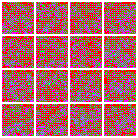

In [4]:
from PIL import Image

image_path = "/content/images/Glow_CIFAR10/generated_epoch_13.png"
image = Image.open(image_path)

image